# 加载参数

In [5]:
import sys
sys.path.append('../')

import yaml
from sklearn.model_selection import train_test_split
import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
from sklearn.manifold import TSNE
import seaborn as sns
import random
import os 
import torch.nn as nn
import torch.nn.functional as F
import torch
from transformers import AutoModel,AutoConfig
from preprocess.preprocess import NewsDataset,DataProcess
from model.model import Sp_SPC,SPC_S,SPC,MTLnet
import matplotlib.pyplot as plt
param=yaml.load(open("param.yaml","r",encoding="utf-8").read(),Loader=yaml.FullLoader)
categorys= 2
UNCASED=param["UNCASED"]
dataset = param["dataset"]
train_clean_tag=['neutral']
batch=3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 加载模型

In [6]:
# Sp-SPC model

In [7]:
model_output=2
Sp_model = Sp_SPC(UNCASED,output=model_output).to(device)
Sp_model.load_state_dict(torch.load("/home/liqingyuan/liqingyuan/source/GSPC/model/sp_spc_0.4_1024_32_2.bin"))  

Some weights of the model checkpoint at ../../transformers/bertweet-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<All keys matched successfully>

In [8]:
model_output=3
Sp_model_3 = Sp_SPC(UNCASED,output=model_output).to(device)
Sp_model_3.load_state_dict(torch.load("/home/liqingyuan/liqingyuan/source/GSPC/model/sp_spc_0.3_1024_32_3.bin"))  

Some weights of the model checkpoint at ../../transformers/bertweet-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<All keys matched successfully>

In [9]:
def test(data_loader,model,flag=True):
        model.eval()
        predictions_senti = []
        predictions_senti_probs=[]
        real_values = []
        tweets_index = []
        embedding = []
        with torch.no_grad():
            for d in data_loader:
                input_ids = d["input_ids"].to(device)
                attention_mask = d["attention_mask"].to(device)
                index = d["tweet"].numpy()
                label = d["label"]
                if flag:         
                    out,_,emb,_ = model(input_ids, attention_mask)
                else:
                    out,emb= model(input_ids, attention_mask)

                _, senti_preds = torch.max(out, dim=1)
                senti_probs = nn.functional.softmax(out, dim=1).cpu().numpy()
                tweets_index.extend(index)
                predictions_senti.extend(senti_preds)
                predictions_senti_probs.extend(senti_probs)
                real_values.extend(label)
                emb = emb.cpu().numpy()
                embedding.extend(emb)

            predictions_senti = torch.stack(predictions_senti).cpu()
            real_values = torch.stack(real_values).numpy()
        return predictions_senti,predictions_senti_probs,real_values,embedding

## SPC model

In [10]:
model_output=2
spc_model = SPC(UNCASED,output=model_output).to(device)
spc_model.load_state_dict(torch.load("/home/liqingyuan/liqingyuan/source/GSPC/model/spc_288789_32_2.bin"))  

Some weights of the model checkpoint at ../../transformers/bertweet-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<All keys matched successfully>

In [11]:
model_output=3
spc_model_3 = SPC(UNCASED,output=model_output).to(device)
spc_model_3.load_state_dict(torch.load("/home/liqingyuan/liqingyuan/source/GSPC/model/spc_235569_32_3.bin"))  

Some weights of the model checkpoint at ../../transformers/bertweet-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<All keys matched successfully>

# SPC-S model

In [12]:
model_output=2
spc_s_model = SPC_S(UNCASED,output=model_output).to(device)
spc_s_model.load_state_dict(torch.load("/home/liqingyuan/liqingyuan/source/GSPC/model/spc_s_237713_32_2.bin"))

Some weights of the model checkpoint at ../../transformers/bertweet-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<All keys matched successfully>

In [13]:
model_output=3
spc_s_3_model = SPC_S(UNCASED,output=model_output).to(device)
spc_s_3_model.load_state_dict(torch.load("/home/liqingyuan/liqingyuan/source/GSPC/model/spc_s_404845_32_3.bin"))

Some weights of the model checkpoint at ../../transformers/bertweet-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<All keys matched successfully>

model_output=4
spc_s_model = AdvNet(UNCASED,output=model_output).to(device)
spc_s_model.load_state_dict(torch.load("../senti/spc-s-2/senti_91_32.bin"))

# MLT model

In [14]:
model_output=2
mlt_model = MTLnet(UNCASED,output=model_output).to(device)
mlt_model.load_state_dict(torch.load("/home/liqingyuan/liqingyuan/source/GSPC/model/mlt_214887_32_2.bin"))

Some weights of the model checkpoint at ../../transformers/bertweet-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<All keys matched successfully>

In [15]:
model_output=3
mlt_3_model = MTLnet(UNCASED,output=model_output).to(device)
mlt_3_model.load_state_dict(torch.load("/home/liqingyuan/liqingyuan/source/GSPC/model/mlt_8130_32_3.bin"))

Some weights of the model checkpoint at ../../transformers/bertweet-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<All keys matched successfully>

# 加载数据

In [17]:
start_dir="../data/SemEval2017-Task1/train_data"
data_dir=os.listdir(start_dir)
print(data_dir)
for file in data_dir:
    dataset['senti_train'].append(os.path.join(start_dir,file))
pdata=DataProcess(dataset,UNCASED) 



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


['twitter-2016test-A.txt', 'twitter-2013test-A.txt', 'twitter-2016dev-A.txt', 'twitter-2013dev-A.txt', 'twitter-2013train-A.txt', 'twitter-2016train-A.txt', 'twitter-2015train-A.txt', 'twitter-2014test-A.txt', 'twitter-2015test-A.txt', 'twitter-2016devtest-A.txt']


In [18]:
#senti_trian_data 
senti_train_data=pdata.read_data(pdata.senti_train,train_clean_tag)
print("\033[0;35;46m senti_train_data read successfully! %d \033[0m" % (len(senti_train_data[0])))
senti_train_data_3=pdata.read_data(pdata.senti_train)
print("\033[0;35;46m senti_train_data read successfully! %d \033[0m" % (len(senti_train_data_3[0])))
sms_train_data=pdata.read_data(pdata.sms_train)
print("\033[0;35;46m sms_train_data read successfully! %d  \033[0m" % (len(sms_train_data[0])))

 senti_train_data read successfully! 27670 
 senti_train_data read successfully! 50248 
 sms_train_data read successfully! 1517  


In [19]:
#train_loader
senti_train_loader=pdata.get_loader(senti_train_data,batch_size=batch)
senti_train_loader_3=pdata.get_loader(senti_train_data_3,batch_size=batch)
sms_train_loader=pdata.get_loader(sms_train_data,batch_size=batch)
sms_train_dict=dict(enumerate(sms_train_loader))
print("\n\033[0;35;46m train_data loader successfully: %s \033[0m" )
print(len(senti_train_loader),len(sms_train_loader))

dict_keys(['input_ids', 'attention_mask'])
dict_keys(['input_ids', 'attention_mask'])
dict_keys(['input_ids', 'attention_mask'])

 train_data loader successfully: %s 
9224 506


../preprocess/preprocess.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [20]:
# PLOT 实现

In [21]:
def tsne(sent_emb,sms_emb,label):
   sent_emb.extend(sms_emb)
   sar_label=np.array([3]*len(sms_emb))
   label=np.append(label,sar_label)
   assert len(label) == len(sent_emb),"fail"
   tsne = TSNE(n_components=2, init='pca',random_state=100)
   tsne_obj= tsne.fit_transform(np.array(sent_emb))
   tsne_df = pd.DataFrame({'x':tsne_obj[:,0],
                           'y':tsne_obj[:,1],
                           'label':label})

   tsne_df = (tsne_df - tsne_df.min()) / (tsne_df.max() - tsne_df.min())
   
   # tsne_df = tsne_df.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
   tsne_df["label"]=label
   tsne_df['label'].replace(0,"N",inplace=True)
   tsne_df['label'].replace(1,"P",inplace=True)
   tsne_df['label'].replace(2,"NT",inplace=True)

   tsne_df['label'].replace(3,"S",inplace=True)
   tsne_df=tsne_df.sample(frac=0.1)
   print(tsne_df['label'].value_counts())
   return tsne_df




In [22]:
def plot(tsne_df,hue_order,color,pic_name):
   fig=plt.figure(figsize=(4, 3.5))
   sns.set_style('white')
   rc = {'font.sans-serif': ['WenQuanYi Micro Hei', 'DejaVu Sans', 'Bitstream Vera Sans']}
   sns.set(context='notebook', style='ticks', font_scale=1.0)
   ax=sns.scatterplot(x="x", y="y",
            hue="label",
            hue_order=hue_order,
         #    style="label",
            palette=color,
            legend='full',
            data=tsne_df,
            s=5)
   ax.set(xlabel=None, ylabel=None)
   handles, labels  =  ax.get_legend_handles_labels()
   print(labels)
   ax.legend(handles,labels,loc='upper right', bbox_to_anchor=(1.27, 1.03),fontsize=14,borderpad=0.1,handletextpad=0.1)  
   ax.set_xticklabels(labels=[0.0,0.0,0.2,0.4,0.6,0.8,1.0],rotation = 0,fontsize=18)
   ax.set_yticklabels(labels=[0.0,0.0,0.2,0.4,0.6,0.8,1.0],rotation = 0,fontsize=18)
   ax.get_figure().savefig(pic_name,dpi=300,bbox_inches='tight')


# SP-SPC eval

In [23]:
## Sp-SPC 2 3 test
print('--------senti_eval----------')
predictions_senti,predictions_senti_probs,label_senti,emb_senti=test(senti_train_loader,Sp_model)

print('--------sms_eval----------')
predictions_sms,predictions_sms_probs,label_sms,emb_sms=test(sms_train_loader,Sp_model)

--------senti_eval----------
--------sms_eval----------


In [24]:
# plot 2
df=tsne(emb_senti,emb_sms,label_senti)

/home/miniconda3/envs/syd/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/miniconda3/envs/syd/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


P    1991
N     796
S     132
Name: label, dtype: int64


In [25]:
df


,x,y,label
6252,0.668193,0.299967,P
15612,0.830602,0.569273,N
27499,0.207068,0.656049,P
14762,0.457507,0.714255,P
15665,0.269268,0.852896,P
...,...,...,...
20266,0.321177,0.787778,P
20439,0.877629,0.605375,N
13524,0.366501,0.757552,P
1650,0.224992,0.425602,P


['N', 'P', 'S']


/home/miniconda3/envs/syd/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/miniconda3/envs/syd/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


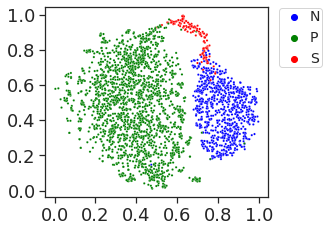

In [26]:
plot(df,["N","P","S"],['blue','green','red'],"pic_jpg/sp-spc-2.jpg")

In [27]:
print('--------senti_eval-3----------')
predictions_senti_3,predictions_senti_probs_3,label_senti_3,emb_senti_3=test(senti_train_loader_3,Sp_model_3)
predictions_sms,predictions_sms_probs,label_sms,emb_sms=test(sms_train_loader,Sp_model_3)

--------senti_eval-3----------


../preprocess/preprocess.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [28]:
# plot 3
df=tsne(emb_senti_3,emb_sms,label_senti_3)

/home/miniconda3/envs/syd/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/miniconda3/envs/syd/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


NT    2250
P     1992
N      794
S      140
Name: label, dtype: int64


['N', 'P', 'NT', 'S']


/home/miniconda3/envs/syd/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/miniconda3/envs/syd/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


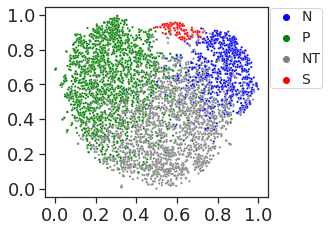

In [29]:
plot(df,["N","P","NT","S"],['blue','green','grey','red'],"pic_jpg/sp-spc-3.jpg")

# SPC eval

In [30]:
print('--------senti_eval----------')
predictions_senti,predictions_senti_probs,label_senti,emb_senti=test(senti_train_loader,spc_model,False)
print('--------sms_eval----------')
predictions_sms,predictions_sms_probs,label_sms,emb_sms=test(sms_train_loader,spc_model,False)

--------senti_eval----------


../preprocess/preprocess.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


--------sms_eval----------


In [31]:
df=tsne(emb_senti,emb_sms,label_senti)

/home/miniconda3/envs/syd/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/miniconda3/envs/syd/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


P    2018
N     746
S     155
Name: label, dtype: int64


['N', 'P', 'S']


/home/miniconda3/envs/syd/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/miniconda3/envs/syd/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


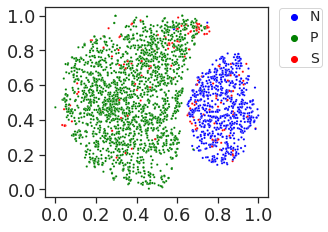

In [32]:
plot(df,["N","P","S"],['blue','green','red'],"pic_jpg/spc-2.jpg")

In [33]:
print('--------senti_eval-3----------')
predictions_senti_3,predictions_senti_probs_3,label_senti_3,emb_senti_3=test(senti_train_loader_3,spc_model_3,False)
predictions_sms,predictions_sms_probs,label_sms,emb_sms=test(sms_train_loader,spc_model_3,False)

--------senti_eval-3----------


../preprocess/preprocess.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [34]:
# plot 3
df=tsne(emb_senti_3,emb_sms,label_senti_3)

/home/miniconda3/envs/syd/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/miniconda3/envs/syd/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


NT    2297
P     2001
N      728
S      150
Name: label, dtype: int64


['N', 'P', 'NT', 'S']


/home/miniconda3/envs/syd/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/miniconda3/envs/syd/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


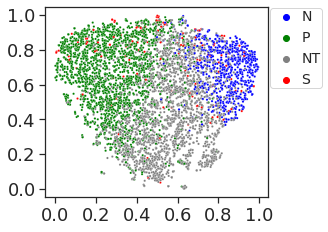

In [35]:
plot(df,["N","P","NT","S"],['blue','green','grey','red'],"pic_jpg/spc-3.jpg")

# SPC-S eval

In [36]:
print('--------senti_eval----------')
predictions_senti,predictions_senti_probs,label_senti,emb_senti=test(senti_train_loader,spc_s_model,False)
print('--------sms_eval----------')
predictions_sms,predictions_sms_probs,label_sms,emb_sms=test(sms_train_loader,spc_s_model,False)

--------senti_eval----------


../preprocess/preprocess.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


--------sms_eval----------


In [37]:
df=tsne(emb_senti,emb_sms,label_senti)

/home/miniconda3/envs/syd/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/miniconda3/envs/syd/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


P    2003
N     762
S     154
Name: label, dtype: int64


['N', 'P', 'S']


/home/miniconda3/envs/syd/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/miniconda3/envs/syd/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


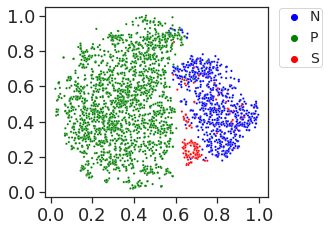

In [38]:
plot(df,["N","P","S"],['blue','green','red'],"pic_jpg/spc-s-2.jpg")

In [39]:
print('--------senti_eval-3----------')
predictions_senti_3,predictions_senti_probs_3,label_senti_3,emb_senti_3=test(senti_train_loader_3,spc_s_3_model,False)
predictions_sms,predictions_sms_probs,label_sms,emb_sms=test(sms_train_loader,spc_s_3_model,False)

--------senti_eval-3----------


../preprocess/preprocess.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [40]:
# plot 3
df=tsne(emb_senti_3,emb_sms,label_senti_3)

/home/miniconda3/envs/syd/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/miniconda3/envs/syd/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


NT    2215
P     2028
N      764
S      169
Name: label, dtype: int64


['N', 'P', 'NT', 'S']


/home/miniconda3/envs/syd/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/miniconda3/envs/syd/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


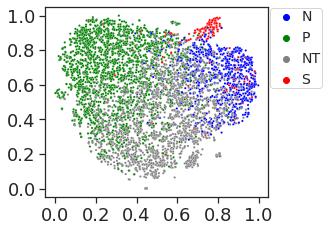

In [41]:
plot(df,["N","P","NT","S"],['blue','green','grey','red'],"pic_jpg/spc-s-3.jpg")

# MLT-sar eval

In [42]:
print('--------senti_eval----------')
predictions_senti,predictions_senti_probs,label_senti,emb_senti=test(senti_train_loader,mlt_model)
print('--------sms_eval----------')
predictions_sms,predictions_sms_probs,label_sms,emb_sms=test(sms_train_loader,mlt_model)

--------senti_eval----------


../preprocess/preprocess.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


--------sms_eval----------


In [43]:
df=tsne(emb_senti,emb_sms,label_senti)

/home/miniconda3/envs/syd/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/miniconda3/envs/syd/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


P    1981
N     790
S     148
Name: label, dtype: int64


['N', 'P', 'S']


/home/miniconda3/envs/syd/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/miniconda3/envs/syd/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


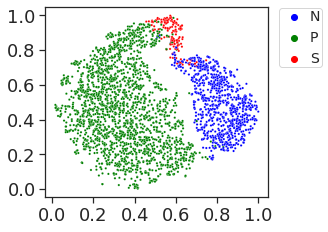

In [44]:
plot(df,["N","P","S"],['blue','green','red'],"pic_jpg/mlt-2.jpg")

In [45]:
print('--------senti_eval-3----------')
predictions_senti_3,predictions_senti_probs_3,label_senti_3,emb_senti_3=test(senti_train_loader_3,mlt_3_model)
predictions_sms,predictions_sms_probs,label_sms,emb_sms=test(sms_train_loader,mlt_3_model)


--------senti_eval-3----------


../preprocess/preprocess.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [ ]:
print("negative",predictions_sms.tolist().count(0)/len(predictions_sms))
print("positive",predictions_sms.tolist().count(1)/len(predictions_sms))

: 

: 

: 

In [ ]:
df=tsne(emb_senti_3,emb_sms,label_senti_3)


: 

In [ ]:
plot(df,["N","P","NT","S"],['blue','green','grey','red'],"pic_jpg/mlt-3.jpg")

: 